# Python для анализа данных

## ДЗ 4

*Придумывал: Ян Пиле, НИУ ВШЭ*  

## Задача 1

Дана страница https://ru.wikipedia.org/wiki/Премия_«Оскар»_за_лучший_фильм#Достижения_по_другим_номинациям_Оскара

Используя удобные для вас модули Python (Например requests, bs4 и pandas, но можно и любые другие) сгрузить в удобную для вас структуру данных (например pandas-табличку) данные о номинантах и победителях премии Оскар за лучший фильм за всю историю существования премии. Заметьте, на страничке эта информация в нескольких таблицах. По данным ответьте на вопросы. P.S. Результат нужно именно посчитать, если на странице в явном виде указан ответ на вопрос, просто выгрузить этот ответ нельзя:

    1. Сколько раз были номинированы фильмы, созданные при участии Стивена Спилберга?
    2. Фильмы какой компании получили больше Оскаров за лучший фильм: Warner Bros. или Paramount Pictures и насколько больше?

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np


In [2]:
text = requests.get('https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%B5%D0%BC%D0%B8%D1%8F_%C2%AB%D0%9E%D1%81%D0%BA%D0%B0%D1%80%C2%BB_%D0%B7%D0%B0_%D0%BB%D1%83%D1%87%D1%88%D0%B8%D0%B9_%D1%84%D0%B8%D0%BB%D1%8C%D0%BC#%D0%94%D0%BE%D1%81%D1%82%D0%B8%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F_%D0%BF%D0%BE_%D0%B4%D1%80%D1%83%D0%B3%D0%B8%D0%BC_%D0%BD%D0%BE%D0%BC%D0%B8%D0%BD%D0%B0%D1%86%D0%B8%D1%8F%D0%BC_%D0%9E%D1%81%D0%BA%D0%B0%D1%80%D0%B0')
tree_new = BeautifulSoup(text.text, features='xml')
table = tree_new.body.find_all('table', {'class':'wikitable'})

df_sum = pd.DataFrame(columns=['year', 'film', 'company', 'producer', 'links'])
# iterate over 10 tables for years
for i_table in range(10):
    df = pd.DataFrame(columns=['year', 'film', 'company', 'producer', 'links'])
    onetable = table[i_table]
    # iterate over all rows
    for elem in onetable.tbody.find_all('tr'):

            row_to_add = []
            for columns in elem.find_all('td'):
                row_to_add.append(columns.text.strip()) # add to a list all texts of a column
            # deal with different column counts
            if len(row_to_add) ==0:
                row_to_add = ['','','','','']
            elif len(row_to_add) == 3:
                row_to_add = ['', *row_to_add, '']
            elif len(row_to_add) == 1:
                row_to_add = [*row_to_add, '','','','']
            elif len(row_to_add) == 4:
                row_to_add = ['',*row_to_add] 

            
            # convert a row into a pd data frame
            our_one_row = pd.DataFrame([row_to_add], columns=['year', 'film', 'company', 'producer', 'links'])
            df = df.append(our_one_row) # add it to a temporary df


    # reset index and remove firs row (there were headings)
    df.reset_index(drop=True, inplace=True)
    df.drop([0], inplace=True)
    df_sum = df_sum.append(df)  # append it to big table
df_sum.reset_index(drop=True, inplace=True)


In [3]:
df_sum.year[df_sum['year']==""] = np.NaN
df_sum.links[df_sum['links']==""] = np.NaN

df_sum = df_sum.fillna(method='ffill')

df_sum.head(20)


,year,film,company,producer,links
0,1929 (1-я),★ «Крылья»,"Paramount Pictures, Famous Players-Lasky",Люсьен Хаббард,[# 1]
1,1929 (1-я),«Рэкет»,"Caddo, Paramount",Говард Хьюз,[# 1]
2,1929 (1-я),«Седьмое небо»,Fox Film Corporation,Уильям Фокс,[# 1]
3,1930-I (2-я),★ «Бродвейская мелодия»,Metro-Goldwyn-Mayer,"Ирвинг Талберг, Лоуренс Уэйнгартен",[# 2]
4,1930-I (2-я),«Алиби»,"Feature Productions, United Artists",Роланд Уэст,[# 2]
5,1930-I (2-я),«Голливудское ревю 1929 года»,Metro-Goldwyn-Mayer,Гарри Рапф,[# 2]
6,1930-I (2-я),«В старой Аризоне»,Fox Film Corporation,Уинфилд Шихэн,[# 2]
7,1930-I (2-я),«Патриот»,Paramount Pictures,Эрнст Любич,[# 2]
8,1930-II (3-я),★ «На западном фронте без перемен»,Universal,Карл Леммле-мл.,[# 3]
9,1930-II (3-я),«Казённый дом»,Metro-Goldwyn-Mayer,Ирвинг Талберг,[# 3]


In [4]:
df_sum.tail()

,year,film,company,producer,links
559,2020 (92-я),«Джокер»,,"Тодд Филлипс, Брэдли Купер и Эмма Тиллинджер К...",[# 87]
560,2020 (92-я),«Маленькие женщины»,,Эми Паскаль,[# 87]
561,2020 (92-я),«Брачная история»,,Ноа Баумбах и Дэвид Хейман,[# 87]
562,2020 (92-я),«1917»,,"Сэм Мендес, Пиппа Харрис, Джейн‑Энн Тенггрен и...",[# 87]
563,2020 (92-я),«Однажды в Голливуде»,,"Дэвид Хейман, Шеннон Макинтош и Квентин Тарантино",[# 87]


### Сколько было Спилберга?

In [5]:
def comma_and_split(input_text):
    """this functions splits names of producers and returns a list of names"""
    input_text = input_text.replace('\xa0', ' ')
    result = []
    for elements in input_text.split(', '):
        for k in elements.split(' и '):
            result.append(k)
    return(result)


In [6]:
producer_count = {}
for row in df_sum.itertuples():
    all_prods = comma_and_split(row.producer)
    for one_producer in all_prods:
        producer_count[one_producer] = producer_count.get(one_producer, 0) + 1
        
# print(producer_count)
print('Стивен Спилберг был продюсером фильмов, которые номинировались ', producer_count['Стивен Спилберг'], 'раз')

Стивен Спилберг был продюсером фильмов, которые номинировались  10 раз


### Warner vs Paramount

In [7]:
companies_oscar ={}

# проходим по всем строкам df
# если есть звездочка в названии фильма - то собираем разбитые по , и "и" названии компаний
for row in df_sum.itertuples():
    if row.film.find('★') != -1:
        all_companies = comma_and_split(row.company)
        for one_company in all_companies:
            companies_oscar[one_company] = companies_oscar.get(one_company, 0) + 1

# for k, v in companies_oscar.items():
#     print(k, v)

# выводим значениям из словаря

print('Warner Bros. издали', companies_oscar['Warner Bros.'], 'фильмов, которые выиграли Оскар')
print('Paramount Pictures издали', companies_oscar['Paramount Pictures'], 'фильмов, которые выиграли Оскар')
print()
all_paramount = companies_oscar['Paramount Pictures'] + companies_oscar['Paramount'] + companies_oscar['Paramount Vantage']
print('Но, если считать название Paramount и дочернюю компанию Paramount Vantage, суммарно - ', all_paramount, 'фильмов')
print('Что на', all_paramount - companies_oscar['Warner Bros.'], 'больше, чем у Warner Bros.')


Warner Bros. издали 10 фильмов, которые выиграли Оскар
Paramount Pictures издали 9 фильмов, которые выиграли Оскар

Но, если считать название Paramount и дочернюю компанию Paramount Vantage, суммарно -  12 фильмов
Что на 2 больше, чем у Warner Bros.


## Задача 2

Дана страница https://ru.wikipedia.org/wiki/Премия_«Оскар»_за_лучшую_женскую_роль

Используя удобные для вас модули Python (Например requests, bs4 и pandas, но можно и любые другие) сгрузить в удобную для вас структуру данных (например pandas-табличку) данные о номинантах и победителях премии Оскар за лучшую женскую роль за всю историю существования премии. Заметьте, на страничке эта информация в нескольких таблицах. По данным ответьте на вопросы. P.S. Результат нужно именно посчитать, если на странице в явном виде указан ответ на вопрос, просто выгрузить этот ответ нельзя:

    1. Какая актриса чаще всего номинировалась на Оскар?
    2. Насколько отличается количество номинаций самой часто номинировавшейся актрисы и второй по частоте?

## Задача 3

Дана страница https://www.worldometers.info/world-population/world-population-by-year/

На ней представлены данные о росте численности населения Земли. Используя удобные для вас модули Python (Например requests, bs4 и pandas, но можно и любые другие) сгрузить в удобную для вас структуру данных (например pandas-табличку) необходимые данные и нарисовать графики ежегодного прироста городского населения и ежегодного прироста общего населения, начиная с 1951 года. Если вы сгрузили данные в pandas-dataframe, графики можно построить так:

In [8]:
import pandas as pd
data = {'dt':['2020-01-01','2020-02-01','2020-03-01','2020-04-01','2020-05-01'],
'value':[1233, 23142,11445,32555,22234]}
df = pd.DataFrame(data)
df

,dt,value
0,2020-01-01,1233
1,2020-02-01,23142
2,2020-03-01,11445
3,2020-04-01,32555
4,2020-05-01,22234


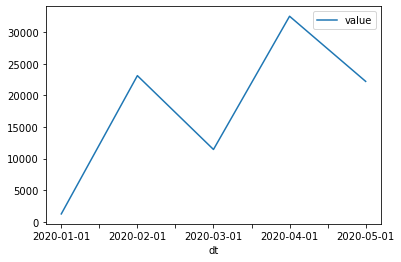

In [9]:
p = df.plot(x='dt', y='value')